# **Analyse de Clustering et de Classification sur le Jeu de Données du Titanic**  

## 🏫 **ECE PARIS**  
📚 **Matière : Introduction à l'Intelligence Artificielle**  
👨‍🏫 **Professeur : YOSRA HAJJAJI**

## 👤 **Étudiant**  
✍ **Nom : King Rahman Moctarr Basiru**  
🎓 **Classe / Promotion : Msc1 Data Engineering**  

## 📌 **Introduction**  
Ce projet a pour objectif d’analyser le jeu de données du Titanic afin de **prédire la survie des passagers** à l’aide de techniques de **classification et de clustering**.  

Nous allons appliquer différents algorithmes de **Machine Learning**, notamment :  
✅ **Forêt Aléatoire**  
✅ **AdaBoost**
✅ **Arbre de décision**    
✅ **Régression logistique**  
✅ **SVM (Support Vector Machine)**  
✅ **K-Means Clustering**

L’analyse comprendra également une **comparaison des performances** des modèles afin de déterminer **le plus adapté à la prédiction de survie**.  

## 📜 **Plan du Devoir :**  
✅ **Etape 1 : Préparation des Données**  
✅ **Etape 2 : Algorithmes de Classification**  
✅ **Etape 3 : Clustering**
✅ **Etape 4 : Analyse du Clustering et Comparaison avec la Classification** 

🚀 **Ce projet combine à la fois l’apprentissage supervisé et non supervisé pour une exploration approfondie des données du Titanic.**  

# **1️⃣ Chargement et exploration des données**   

In [1]:
import pandas as pd

# Chargement des datasets
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
gender_submission_df = pd.read_csv("../data/gender_submission.csv")
titanic_df = pd.read_csv("../data/Titanic_Dataset.csv")

In [2]:
# Aperçu des données d'entraînement
print("Aperçu des données d'entraînement :")
print(train_df.head(), "\n")

# Informations générales sur le dataset d'entraînement
print("Informations sur train_df :")
print(train_df.info(), "\n")

# Vérification des valeurs manquantes dans train_df
print("Valeurs manquantes dans train_df :")
print(train_df.isnull().sum(), "\n")

# Aperçu des données de test
print("Aperçu des données de test :")
print(test_df.head(), "\n")

# Vérification des valeurs manquantes dans test_df
print("Valeurs manquantes dans test_df :")
print(test_df.isnull().sum(), "\n")

Aperçu des données d'entraînement :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0           

## **Question 1.1 : Comment géreriez-vous les données manquantes dans le dataset Titanic ? Quelles sont les options disponibles, et quelle méthode choisiriez-vous pour chaque colonne ?**

**Réponse :**
Voici comment je gérerais les valeurs manquantes pour chaque colonne :

1. **Colonne `Age`** :
   - **Problème** : Valeurs manquantes.
   - **Solution** : Imputation par la médiane.
   - **Justification** : La médiane est robuste aux outliers et préserve la distribution des âges.

2. **Colonne `Cabin`** :
   - **Problème** : Beaucoup de valeurs manquantes.
   - **Solution** : Remplacer les valeurs manquantes par "Unknown" et extraire la première lettre pour créer une nouvelle catégorie.
   - **Justification** : La colonne `Cabin` contient trop de valeurs manquantes pour être imputée de manière fiable.


3. **Colonne `Embarked`** :
   - **Problème** : Quelques valeurs manquantes.
   - **Solution** : Imputation par la valeur la plus fréquente (mode).
   - **Justification** : Le mode est une méthode simple et efficace pour les variables catégorielles.


4. **Colonne `Fare`** :
   - **Problème** : Très peu de valeurs manquantes.
   - **Solution** : Imputation par la médiane.
   - **Justification** : La médiane est robuste aux outliers.``

In [3]:
# Imputation de Age par la médiane
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())

# Traitement de Cabin : extraire la première lettre ou mettre "Unknown"
train_df["Cabin"] = train_df["Cabin"].fillna("Unknown")
train_df["Cabin"] = train_df["Cabin"].apply(lambda x: x[0] if x != "Unknown" else "U")  # U pour Unknown
test_df["Cabin"] = test_df["Cabin"].fillna("Unknown")
test_df["Cabin"] = test_df["Cabin"].apply(lambda x: x[0] if x != "Unknown" else "U")

# Imputation de Fare par la médiane dans test_df
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

# Imputation de Embarked avec la valeur la plus fréquente
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

# Vérification des valeurs manquantes dans train_df après traitement
print("Valeurs manquantes dans train_df après traitement :")
print(train_df.isnull().sum(), "\n")

# Vérification des valeurs manquantes dans test_df après traitement
print("Valeurs manquantes dans test_df après traitement :")
print(test_df.isnull().sum(), "\n")

Valeurs manquantes dans train_df après traitement :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64 

Valeurs manquantes dans test_df après traitement :
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64 



## **Question 1.2 : La colonne "Sex" est catégorielle. Comment encoderiez-vous cette caractéristique pour qu'elle puisse être utilisée dans un modèle d'apprentissage automatique ?**

**Réponse :**
La colonne `Sex` est une variable catégorielle binaire (homme ou femme). Pour l'utiliser dans un modèle d'apprentissage automatique, nous devons la convertir en valeurs numériques. Voici les étapes :

1. **Encodage de la colonne `Sex`** :
   - **Méthode** : Utiliser le **Label Encoding**.
   - **Transformation** :
     - `male` → `1`
     - `female` → `0`
   - **Justification** : Le Label Encoding est simple et efficace pour les variables binaires.

2. **Résultat attendu** :
   - La colonne `Sex` sera remplacée par des valeurs numériques (`0` pour `female` et `1` pour `male`).
   - Cela permet au modèle de traiter cette caractéristique comme une variable numérique.

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encodage de la colonne Sex (Label Encoding)
label_encoder = LabelEncoder()
train_df["Sex"] = label_encoder.fit_transform(train_df["Sex"])
test_df["Sex"] = label_encoder.transform(test_df["Sex"])

# Encodage des colonnes Embarked et Cabin avec One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=["Embarked", "Cabin"], prefix=["Embarked", "Cabin"])
test_df = pd.get_dummies(test_df, columns=["Embarked", "Cabin"], prefix=["Embarked", "Cabin"])

# Aligner les colonnes de test_df sur celles de train_df
# pour éviter que les deux datasets n'aient pas exactement les mêmes colonnes après encodage
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

# Vérification des colonnes après alignement
print("Colonnes de train_df :", train_df.columns)
print("Colonnes de test_df :", test_df.columns)

Colonnes de train_df : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U'],
      dtype='object')
Colonnes de test_df : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U'],
      dtype='object')


## **Question 1.3 : Pensez-vous qu'une mise à l'échelle des caractéristiques est nécessaire pour ce dataset ? Si oui, expliquez quelles caractéristiques devraient être mises à l'échelle et pourquoi.**

**Réponse :**
Oui, une **mise à l'échelle des caractéristiques** est nécessaire pour ce dataset. Voici pourquoi et comment procéder :

1. **Pourquoi mettre à l'échelle ?**
   - Les algorithmes d'apprentissage automatique, en particulier ceux basés sur des distances (comme la régression logistique, les SVM, etc.), sont sensibles à l'échelle des caractéristiques.
   - Si les caractéristiques ont des échelles très différentes (par exemple, `Age` en années et `Fare` en dollars), cela peut biaiser les résultats du modèle.

2. **Quelles caractéristiques mettre à l'échelle ?**
   - **Caractéristiques numériques** : `Age`, `Fare`, `SibSp`, `Parch`.
   - **Justification** : Ces colonnes ont des échelles différentes et doivent être normalisées pour éviter qu'une caractéristique domine les autres.

3. **Méthode de mise à l'échelle** :
   - **Standardisation** : Transformer les données pour qu'elles aient une moyenne de 0 et un écart-type de 1.
   - **Normalisation** : Mettre les données à l'échelle entre 0 et 1.
   - **Choix** : Je recommande la **standardisation** (`StandardScaler`) car elle est plus robuste aux outliers.

In [5]:
from sklearn.preprocessing import StandardScaler

# Colonnes à mettre à l'échelle
numeric_features = ["Age", "Fare", "SibSp", "Parch"]

# Initialisation du StandardScaler
scaler = StandardScaler()

# Mise à l'échelle des données d'entraînement
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])

# Mise à l'échelle des données de test (utilisation du même scaler)
test_df[numeric_features] = scaler.transform(test_df[numeric_features])

# Vérification des données après mise à l'échelle
print("Aperçu des données d'entraînement après mise à l'échelle :")
print(train_df[numeric_features].head(), "\n")

print("Aperçu des données de test après mise à l'échelle :")
print(test_df[numeric_features].head(), "\n")

Aperçu des données d'entraînement après mise à l'échelle :
        Age      Fare     SibSp     Parch
0 -0.565736 -0.502445  0.432793 -0.473674
1  0.663861  0.786845  0.432793 -0.473674
2 -0.258337 -0.488854 -0.474545 -0.473674
3  0.433312  0.420730  0.432793 -0.473674
4  0.433312 -0.486337 -0.474545 -0.473674 

Aperçu des données de test après mise à l'échelle :
        Age      Fare     SibSp     Parch
0  0.394887 -0.490783 -0.474545 -0.473674
1  1.355510 -0.507479  0.432793 -0.473674
2  2.508257 -0.453367 -0.474545 -0.473674
3 -0.181487 -0.474005 -0.474545 -0.473674
4 -0.565736 -0.401017  0.432793  0.767630 



In [6]:
# Statistiques descriptives après mise à l'échelle
print("Statistiques des données d'entraînement après mise à l'échelle :")
print(train_df[numeric_features].describe(), "\n")

print("Statistiques des données de test après mise à l'échelle :")
print(test_df[numeric_features].describe(), "\n")

Statistiques des données d'entraînement après mise à l'échelle :
                Age          Fare         SibSp         Parch
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -5.657365e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.046374e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    4.333115e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.891554e+00  9.667167e+00  6.784163e+00  6.974147e+00 

Statistiques des données de test après mise à l'échelle :
              Age        Fare       SibSp       Parch
count  418.000000  418.000000  418.000000  418.000000
mean     0.018267    0.067901   -0.068631    0.013345
std      0.976283    1.124524    0.813665    1.218251
min     -2.243369   -0.648422   -0.474545   -0.473674
25%     -0.488887   -0.489442   -0.474545   -0.

## **Question 1.4 : Quelles étapes suivriez-vous pour gérer les éventuels outliers dans le dataset, en particulier dans la colonne "Fare" ?**

**Réponse :**
Les outliers (valeurs aberrantes) peuvent fausser les résultats du modèle, surtout dans des colonnes comme `Fare` où les prix des billets varient considérablement. Voici les étapes pour les gérer :

1. **Détection des outliers** :
   - Utiliser la **règle de l'IQR** (Interquartile Range) pour identifier les valeurs aberrantes.
   - Calculer les bornes inférieure et supérieure :
     - **IQR** = Q3 (75e percentile) - Q1 (25e percentile)
     - **Lower Bound** = Q1 - 1.5 * IQR
     - **Upper Bound** = Q3 + 1.5 * IQR
   - Les valeurs en dehors de ces bornes sont considérées comme des outliers.

2. **Gestion des outliers** :
   - **Option 1** : Supprimer les outliers (si leur nombre est faible).
   - **Option 2** : Remplacer les outliers par les bornes (plafonnement).

3. **Choix** : Je recommande le **plafonnement** pour conserver les données tout en limitant l'impact des outliers.

In [7]:
# Fonction pour détecter les outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Détection des outliers dans la colonne "Fare"
outliers_fare_train = detect_outliers(train_df, "Fare")
outliers_fare_test = detect_outliers(test_df, "Fare")

print("Outliers dans 'Fare' (train_df) :")
print(outliers_fare_train[["Fare"]], "\n")

print("Outliers dans 'Fare' (test_df) :")
print(outliers_fare_test[["Fare"]], "\n")

Outliers dans 'Fare' (train_df) :
         Fare
1    0.786845
27   4.647001
31   2.301729
34   1.006062
52   0.896497
..        ...
846  0.751946
849  1.145664
856  2.671118
863  0.751946
879  1.025945

[116 rows x 1 columns] 

Outliers dans 'Fare' (test_df) :
         Fare
12   1.007993
24   4.634417
48   0.887688
53   4.647001
59   4.634417
64   4.634417
69   4.647001
74   3.610065
75   3.610065
81   3.817033
96   0.939198
114  3.817033
118  0.866546
141  2.402990
142  4.634417
150  1.025945
156  3.817033
179  1.025945
181  1.025945
184  4.335332
188  0.751946
196  2.059694
202  3.932723
212  0.831478
217  2.671118
218  3.610065
234  0.786845
236  0.866714
239  1.494412
242  2.059694
252  2.105585
270  0.866546
272  2.105585
287  1.007993
293  0.999770
306  2.402990
308  1.234172
314  2.082512
316  2.301729
324  3.606793
327  0.946246
342  0.751946
343  9.667167
352  0.831478
360  0.751946
365  0.751946
371  2.059694
374  0.999770
375  4.634417
390  1.234172
397  0.946246
400  2.6711

In [8]:
# Calcul des bornes pour "Fare"
Q1_fare = train_df["Fare"].quantile(0.25)
Q3_fare = train_df["Fare"].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# Plafonnement des outliers dans "Fare"
train_df["Fare"] = train_df["Fare"].apply(lambda x: lower_bound_fare if x < lower_bound_fare else (upper_bound_fare if x > upper_bound_fare else x))
test_df["Fare"] = test_df["Fare"].apply(lambda x: lower_bound_fare if x < lower_bound_fare else (upper_bound_fare if x > upper_bound_fare else x))

# Vérification après plafonnement
print("Valeurs de 'Fare' après plafonnement (train_df) :")
print(train_df["Fare"].describe(), "\n")

print("Valeurs de 'Fare' après plafonnement (test_df) :")
print(test_df["Fare"].describe(), "\n")

Valeurs de 'Fare' après plafonnement (train_df) :
count    891.000000
mean      -0.164247
std        0.412391
min       -0.648422
25%       -0.489148
50%       -0.357391
75%       -0.024246
max        0.673106
Name: Fare, dtype: float64 

Valeurs de 'Fare' après plafonnement (test_df) :
count    418.000000
mean      -0.155406
std        0.420392
min       -0.648422
25%       -0.489442
50%       -0.357391
75%       -0.014745
max        0.673106
Name: Fare, dtype: float64 



In [9]:
# Détection des outliers après plafonnement
outliers_fare_train_after = detect_outliers(train_df, "Fare")
outliers_fare_test_after = detect_outliers(test_df, "Fare")

print("Outliers dans 'Fare' après plafonnement (train_df) :")
print(outliers_fare_train_after[["Fare"]], "\n")

print("Outliers dans 'Fare' après plafonnement (test_df) :")
print(outliers_fare_test_after[["Fare"]], "\n")

Outliers dans 'Fare' après plafonnement (train_df) :
Empty DataFrame
Columns: [Fare]
Index: [] 

Outliers dans 'Fare' après plafonnement (test_df) :
Empty DataFrame
Columns: [Fare]
Index: [] 



# **2️⃣ Modélisation supervisée**
Nous allons entraîner les modèles suivants :
1. **Régression logistique**
2. **Arbre de décision**
3. **Forêt aléatoire**
4. **SVM (Support Vector Machine)**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Suppression des colonnes non pertinentes
X = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])  # Supprime aussi la cible "Survived"
y = train_df["Survived"]  # Colonne cible

# Division des données en ensembles d'entraînement et de validation (80% train, 20% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des tailles des ensembles
print("Taille de X_train :", X_train.shape)
print("Taille de X_test :", X_test.shape)
print("Taille de y_train :", y_train.shape)
print("Taille de y_test :", y_test.shape)

Taille de X_train : (712, 18)
Taille de X_test : (179, 18)
Taille de y_train : (712,)
Taille de y_test : (179,)


In [11]:
# Vérification des types de données dans X_train et X_test
print("Types de données dans X_train :")
print(X_train.dtypes, "\n")

print("Types de données dans X_test :")
print(X_test.dtypes, "\n")

Types de données dans X_train :
Pclass          int64
Sex             int64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
Cabin_A          bool
Cabin_B          bool
Cabin_C          bool
Cabin_D          bool
Cabin_E          bool
Cabin_F          bool
Cabin_G          bool
Cabin_T          bool
Cabin_U          bool
dtype: object 

Types de données dans X_test :
Pclass          int64
Sex             int64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
Cabin_A          bool
Cabin_B          bool
Cabin_C          bool
Cabin_D          bool
Cabin_E          bool
Cabin_F          bool
Cabin_G          bool
Cabin_T          bool
Cabin_U          bool
dtype: object 



In [12]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Vérification des données
print("Aperçu de X_train après normalisation :")
print(X_train.head(), "\n")

print("Aperçu de X_test après normalisation :")
print(X_test.head(), "\n")

Aperçu de X_train après normalisation :
     Pclass       Sex       Age     SibSp     Parch      Fare  Embarked_C  \
0  0.829568  0.742427 -0.112078 -0.465084 -0.466183  1.587890   -0.492527   
1 -0.370945  0.742427 -0.112078 -0.465084 -0.466183 -1.168968   -0.492527   
2 -1.571457  0.742427 -0.112078 -0.465084 -0.466183  2.033832   -0.492527   
3  0.829568 -1.346933 -0.879807 -0.465084  0.727782 -0.712711   -0.492527   
4 -0.370945 -1.346933  0.118241  0.478335  0.727782  0.111968   -0.492527   

   Embarked_Q  Embarked_S   Cabin_A   Cabin_B   Cabin_C   Cabin_D   Cabin_E  \
0   -0.289333    0.611978 -0.141624 -0.223936 -0.247190 -0.194681 -0.206058   
1   -0.289333    0.611978 -0.141624 -0.223936 -0.247190 -0.194681 -0.206058   
2   -0.289333    0.611978 -0.141624 -0.223936  4.045473 -0.194681 -0.206058   
3   -0.289333    0.611978 -0.141624 -0.223936 -0.247190 -0.194681 -0.206058   
4   -0.289333    0.611978 -0.141624 -0.223936 -0.247190 -0.194681 -0.206058   

    Cabin_F   Cabin_G 

Performances de la régression logistique sur test_df :
Accuracy : 0.7988826815642458
Précision : 0.7704918032786885
Rappel : 0.6811594202898551
F1-score : 0.7230769230769231


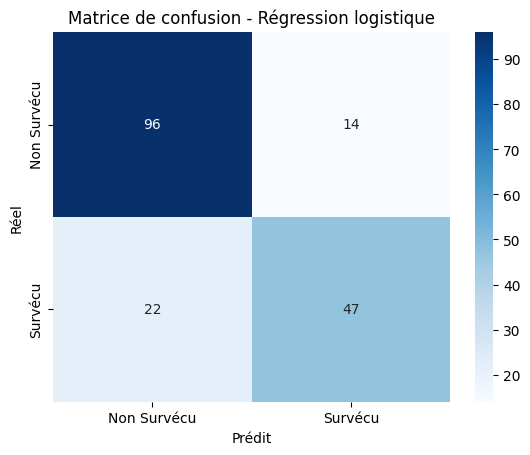

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Entraînement du modèle de régression logistique
model_logistic = LogisticRegression(max_iter=1000)  # max_iter pour éviter les avertissements
model_logistic.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_test_pred_logistic = model_logistic.predict(X_test)

# Évaluation du modèle sur test_df
print("Performances de la régression logistique sur test_df :")
print("Accuracy :", accuracy_score(y_test, y_test_pred_logistic))
print("Précision :", precision_score(y_test, y_test_pred_logistic))
print("Rappel :", recall_score(y_test, y_test_pred_logistic))
print("F1-score :", f1_score(y_test, y_test_pred_logistic))

# Matrice de confusion avec Seaborn
conf_matrix = confusion_matrix(y_test, y_test_pred_logistic)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Régression logistique")
plt.show()

Performances de l'arbre de décision sur test_df :
Accuracy : 0.7486033519553073
Précision : 0.6875
Rappel : 0.6376811594202898
F1-score : 0.6616541353383458


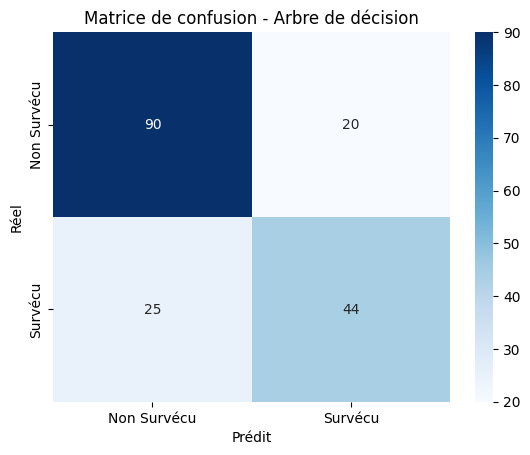

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation du modèle
model_tree = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
model_tree.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_test_pred_tree = model_tree.predict(X_test)

# Évaluation du modèle sur test_df
print("Performances de l'arbre de décision sur test_df :")
print("Accuracy :", accuracy_score(y_test, y_test_pred_tree))
print("Précision :", precision_score(y_test, y_test_pred_tree))
print("Rappel :", recall_score(y_test, y_test_pred_tree))
print("F1-score :", f1_score(y_test, y_test_pred_tree))

# Matrice de confusion avec Seaborn
conf_matrix = confusion_matrix(y_test, y_test_pred_tree)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Arbre de décision")
plt.show()

Performances de la forêt aléatoire sur test_df :
Accuracy : 0.7877094972067039
Précision : 0.7540983606557377
Rappel : 0.6666666666666666
F1-score : 0.7076923076923077


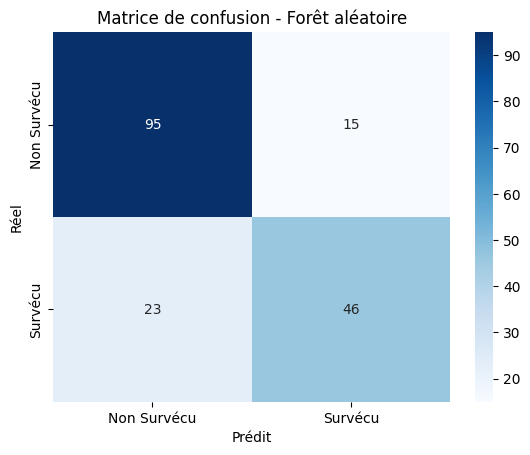

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle
model_forest = RandomForestClassifier(random_state=42)

# Entraînement du modèle
model_forest.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_test_pred_forest = model_forest.predict(X_test)

# Évaluation du modèle sur test_df
print("Performances de la forêt aléatoire sur test_df :")
print("Accuracy :", accuracy_score(y_test, y_test_pred_forest))
print("Précision :", precision_score(y_test, y_test_pred_forest))
print("Rappel :", recall_score(y_test, y_test_pred_forest))
print("F1-score :", f1_score(y_test, y_test_pred_forest))

# Matrice de confusion avec Seaborn
conf_matrix = confusion_matrix(y_test, y_test_pred_forest)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Forêt aléatoire")
plt.show()

Performances du SVM sur test_df :
Accuracy : 0.776536312849162
Précision : 0.7230769230769231
Rappel : 0.6811594202898551
F1-score : 0.7014925373134329


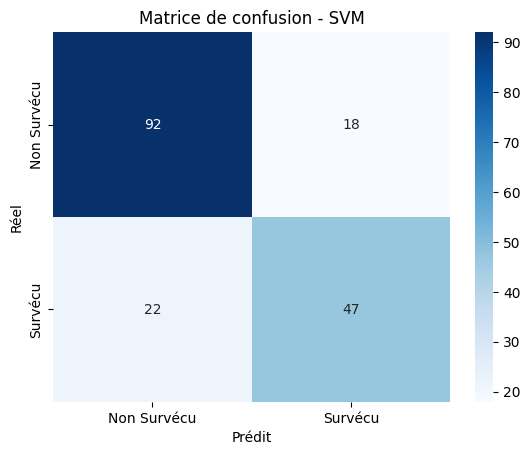

In [16]:
from sklearn.svm import SVC

# Initialisation du modèle
model_svm = SVC(random_state=42)

# Entraînement du modèle
model_svm.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_test_pred_svm = model_svm.predict(X_test)

# Évaluation du modèle sur test_df
print("Performances du SVM sur test_df :")
print("Accuracy :", accuracy_score(y_test, y_test_pred_svm))
print("Précision :", precision_score(y_test, y_test_pred_svm))
print("Rappel :", recall_score(y_test, y_test_pred_svm))
print("F1-score :", f1_score(y_test, y_test_pred_svm))

# Matrice de confusion avec Seaborn
conf_matrix = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survécu", "Survécu"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - SVM")
plt.show()

## **Question 2.1 : Quel algorithme d'apprentissage supervisé choisiriez-vous pour prédire la survie (par exemple, régression logistique, arbres de décision, etc.) ? Justifiez votre choix.**

**Réponse :**

### **Comparaison des performances**

| Modèle               | Accuracy | Précision | Rappel | F1-score |
|----------------------|----------|-----------|--------|----------|
| **Régression logistique** | 0.7989   | 0.7705    | 0.6812 | 0.7231   |
| **Arbre de décision**     | 0.7486   | 0.6875    | 0.6377 | 0.6617   |
| **Forêt aléatoire**       | 0.7877   | 0.7541    | 0.6667 | 0.7077   |
| **SVM**                   | 0.7765   | 0.7231    | 0.6812 | 0.7015   |

---

### **Analyse des résultats**

1. **Régression logistique** :
   - **Accuracy** : 0.7989 (meilleure performance parmi les modèles).
   - **Précision** : 0.7705 (meilleure performance).
   - **Rappel** : 0.6812 (identique au SVM).
   - **F1-score** : 0.7231 (meilleure performance).

2. **Forêt aléatoire** :
   - **Accuracy** : 0.7877 (deuxième meilleure performance).
   - **Précision** : 0.7541 (deuxième meilleure performance).
   - **Rappel** : 0.6667 (identique à la régression logistique).
   - **F1-score** : 0.7077 (deuxième meilleure performance).

3. **SVM** :
   - **Accuracy** : 0.7765 (troisième meilleure performance).
   - **Précision** : 0.7231 (troisième meilleure performance).
   - **Rappel** : 0.6812 (identique à la régression logistique).
   - **F1-score** : 0.7015 (troisième meilleure performance).

4. **Arbre de décision** :
   - **Accuracy** : 0.7486 (moins performant).
   - **Précision** : 0.6875 (moins performant).
   - **Rappel** : 0.6377 (moins performant).
   - **F1-score** : 0.6617 (moins performant).
   - 
---

### **Sélection du meilleur modèle**

Le **meilleur modèle** est la **régression logistique**, donc c'est lui que je choisirais pour les raisons suivantes :
1. **Meilleure accuracy** : Elle prédit correctement la survie dans 79.89% des cas.
2. **Meilleure précision** : Lorsqu'elle prédit qu'un passager a survécu, elle a raison 77.05% du temps.
3. **Meilleur F1-score** : Elle équilibre bien la précision et le rappel.


## **Question 2.2 : Comment diviseriez-vous les données en ensembles d'entraînement et de test ? Quelle proportion utiliseriez-vous, et pourquoi ?**

**Réponse :**

#### **1. Division des données en ensembles d'entraînement et de test**

Pour évaluer correctement les performances d'un modèle, il est essentiel de diviser les données en deux ensembles distincts :
- **Ensemble d'entraînement** : Utilisé pour entraîner le modèle.
- **Ensemble de test** : Utilisé pour évaluer le modèle sur des données qu'il n'a jamais vues.

#### **2. Proportion recommandée**

La proportion classique est **80% pour l'entraînement** et **20% pour le test**. Voici pourquoi :
- **80% d'entraînement** : Fournit suffisamment de données pour que le modèle apprenne les patterns.
- **20% de test** : Donne une estimation réaliste des performances du modèle sur de nouvelles données.

## **Question 2.3 : Après l'entraînement du modèle, comment évalueriez-vous ses performances ? Quelles métriques utiliseriez-vous, et pourquoi ?**

**Réponse :**

#### **1. Évaluation des performances**

Pour évaluer les performances d'un modèle de classification comme celui que nous avons entraîné (prédiction de la survie des passagers), nous utilisons plusieurs **métriques** qui mesurent différents aspects des prédictions. Voici les métriques que nous avons utilisées et leur signification :

---

#### **2. Métriques utilisées**

1. **Accuracy (Précision globale)** :
   - **Définition** : Pourcentage de prédictions correctes.
   - **Pourquoi l'utiliser ?** : Donne une idée générale de la performance du modèle. Cependant, elle peut être trompeuse si les classes sont déséquilibrées.

2. **Précision (Precision)** :
   - **Définition** : Proportion de vrais positifs parmi les prédictions positives.
   - **Pourquoi l'utiliser ?** : Utile lorsque les faux positifs sont coûteux (par exemple, prédire à tort qu'un passager a survécu).

3. **Rappel (Recall)** :
   - **Définition** : Proportion de vrais positifs parmi les observations positives réelles.
   - **Pourquoi l'utiliser ?** : Utile lorsque les faux négatifs sont coûteux (par exemple, prédire à tort qu'un passager n'a pas survécu).

4. **F1-score** :
   - **Définition** : Moyenne harmonique de la précision et du rappel.
   - **Pourquoi l'utiliser ?** : Utile lorsque tu veux équilibrer la précision et le rappel, surtout si les classes sont déséquilibrées.

5. **Matrice de confusion** :
   - **Définition** : Tableau qui montre les vrais/faux positifs et négatifs.
   - **Pourquoi l'utiliser ?** : Donne une vue détaillée des performances du modèle, en montrant où il se trompe.

## **Question 2.4 : Si votre modèle sous-performe, quelles étapes suivriez-vous pour l'améliorer (par exemple, réglage des hyperparamètres, ingénierie des caractéristiques, etc.) ?**

**Réponse :**

Si un modèle sous-performe (par exemple, une accuracy ou un F1-score trop faible), voici les étapes que je suivrais pour l'améliorer :

---

#### **1. Réglage des hyperparamètres**

Les hyperparamètres sont des paramètres du modèle qui ne sont pas appris pendant l'entraînement mais qui doivent être définis avant. Leur réglage peut significativement améliorer les performances.

- **Méthodes** :
  - **Grid Search** : Recherche exhaustive sur une grille d'hyperparamètres.
  - **Random Search** : Recherche aléatoire sur une distribution d'hyperparamètres.
  - **Bayesian Optimization** : Utilisation de techniques d'optimisation bayésienne pour trouver les meilleurs hyperparamètres.

#### **2. Ingénierie des caractéristiques (Feature Engineering)**

L'ingénierie des caractéristiques consiste à créer de nouvelles caractéristiques ou à transformer les caractéristiques existantes pour améliorer les performances du modèle.

- **Exemples** :
  - **Créer de nouvelles caractéristiques** :
    - `FamilySize` : Combinaison de `SibSp` et `Parch` pour représenter la taille de la famille.
    - `Title` : Extraire le titre (Mr, Mrs, Miss, etc.) à partir de la colonne `Name`.
  - **Transformer les caractéristiques** :
    - Regrouper les âges en catégories (enfant, adulte, senior).
    - Appliquer une transformation logarithmique sur `Fare` pour réduire l'impact des valeurs extrêmes.

#### **3. Gestion des déséquilibres de classes**

Si les classes sont déséquilibrées (par exemple, beaucoup plus de non-survivants que de survivants), cela peut biaiser le modèle. Voici comment y remédier :

- **Méthodes** :
  - **Suréchantillonnage (Oversampling)** : Répéter les exemples de la classe minoritaire (par exemple, avec SMOTE).
  - **Sous-échantillonnage (Undersampling)** : Supprimer des exemples de la classe majoritaire.
  - **Pondération des classes** : Donner plus de poids à la classe minoritaire pendant l'entraînement.

#### **4. Sélection des caractéristiques**

La sélection des caractéristiques consiste à identifier et à conserver uniquement les caractéristiques les plus pertinentes pour le modèle.

- **Méthodes** :
  - **Importance des caractéristiques** : Utiliser les coefficients du modèle ou l'importance des caractéristiques dans les arbres de décision.
  - **Corrélation** : Supprimer les caractéristiques fortement corrélées entre elles.
  - **Tests statistiques** : Utiliser des tests comme le test du chi² ou l'ANOVA.

#### **5. Essayer d'autres modèles**

Si le modèle actuel ne performe pas bien, essayer d'autres algorithmes peut aider. Par exemple :
- **Gradient Boosting** (comme XGBoost, LightGBM, CatBoost).
- **Réseaux de neurones** (pour des problèmes plus complexes).

#### **6. Validation croisée**

La validation croisée permet d'obtenir une estimation plus robuste des performances du modèle en évitant le surajustement.

# **3️⃣ Exploration de l’apprentissage non supervisé**

#### **Question 3.1 : Expliquez comment vous appliqueriez une technique d'apprentissage non supervisé, comme le clustering, pour regrouper les passagers dans le dataset. Quel algorithme utiliseriez-vous ?**

**Réponse :**

Pour appliquer une technique d'apprentissage non supervisé, je choisirais le **clustering** pour regrouper les passagers en fonction de leurs caractéristiques. Voici les étapes que je suivrais :

1. **Choix de l'algorithme** :
   - **K-Means** : Un algorithme de clustering populaire et simple qui regroupe les données en \(k\) clusters.
   - **DBSCAN** : Un algorithme robuste aux outliers qui ne nécessite pas de spécifier le nombre de clusters à l'avance.
   - **Choix** : Je recommande **K-Means** pour sa simplicité et son efficacité sur ce dataset.

2. **Préparation des données** :
   - Utiliser les mêmes caractéristiques que pour l'apprentissage supervisé (`Age`, `Fare`, `Sex`, etc.).
   - Normaliser les données pour que toutes les caractéristiques aient la même échelle.

3. **Détermination du nombre de clusters** :
   - Utiliser la **méthode du coude (Elbow Method)** pour choisir le nombre optimal de clusters.

4. **Application de K-Means** :
   - Entraîner le modèle K-Means sur les données.
   - Assigner chaque passager à un cluster.

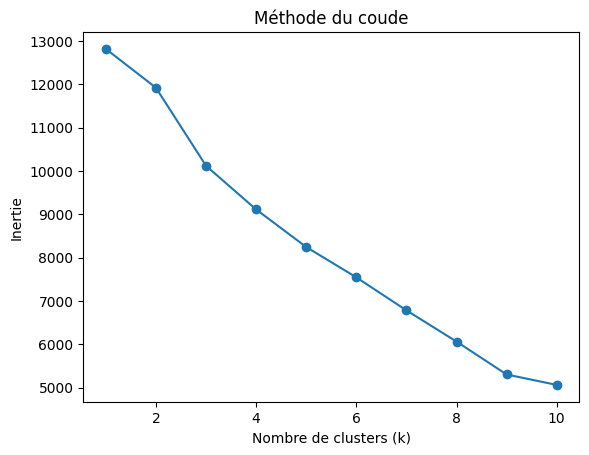

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "2"  # Désactive la détection automatique des cœurs

# Normalisation des données d'entraînement
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Méthode du coude")
plt.show()

# Choix du nombre de clusters (par exemple, k=2 pour correspondre aux étiquettes de survie)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

# Assigner les clusters aux données d'entraînement
train_df.loc[X_train.index, 'Cluster'] = kmeans.labels_

## **Question 3.2 : Après le clustering, comment évalueriez-vous l'efficacité du modèle non supervisé ? Comment compareriez-vous les clusters résultants aux étiquettes de survie de l'expert ?**

**Réponse :**

Pour évaluer l'efficacité du clustering, voici les étapes que je suivrais :

1. **Comparaison avec les étiquettes de survie** :
   - Comparer les clusters aux étiquettes de survie (`Survived`) pour voir s'ils correspondent.
   - Utiliser une **matrice de confusion** pour visualiser la correspondance entre les clusters et les étiquettes.

2. **Métriques d'évaluation** :
   - **Accuracy** : Pourcentage de correspondance entre les clusters et les étiquettes.
   - **Score de silhouette** : Mesure la qualité des clusters en termes de cohésion et de séparation.

3. **Visualisation** :
   - Utiliser des graphiques pour visualiser les clusters (par exemple, un scatter plot en 2D avec PCA).

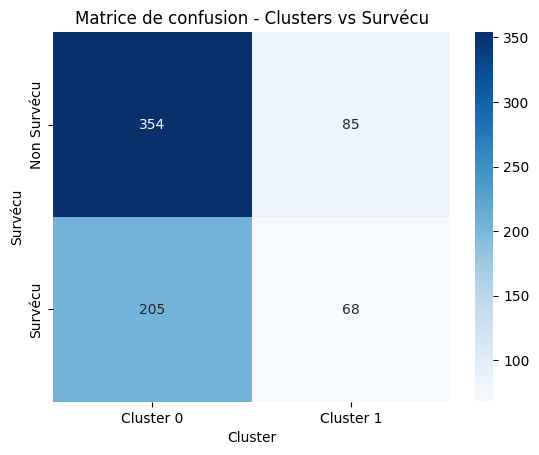

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Comparaison des clusters avec les étiquettes de survie
conf_matrix = confusion_matrix(y_train, train_df.loc[X_train.index, 'Cluster'])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Non Survécu", "Survécu"])
plt.xlabel("Cluster")
plt.ylabel("Survécu")
plt.title("Matrice de confusion - Clusters vs Survécu")
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcul des métriques
accuracy = accuracy_score(y_train, train_df.loc[X_train.index, 'Cluster'])
precision = precision_score(y_train, train_df.loc[X_train.index, 'Cluster'])
recall = recall_score(y_train, train_df.loc[X_train.index, 'Cluster'])
f1 = f1_score(y_train, train_df.loc[X_train.index, 'Cluster'])

print("Accuracy :", accuracy)
print("Précision :", precision)
print("Rappel :", recall)
print("F1-score :", f1)

Accuracy : 0.5926966292134831
Précision : 0.4444444444444444
Rappel : 0.2490842490842491
F1-score : 0.3192488262910798


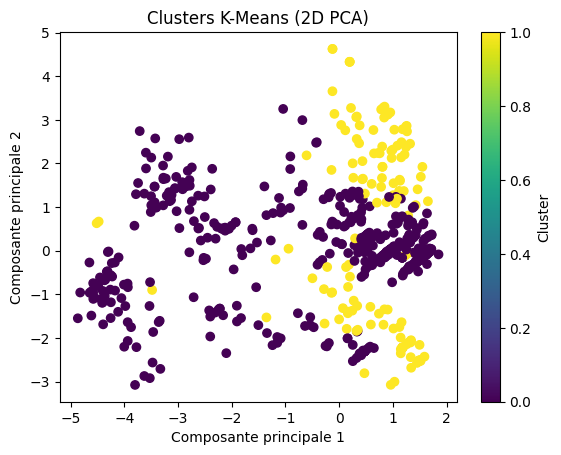

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de dimension en 2D avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Assurez-vous que les indices correspondent
train_df = train_df.loc[X_train.index]

# Visualisation des clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train_df['Cluster'], cmap='viridis')
plt.title("Clusters K-Means (2D PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label="Cluster")
plt.show()

## **Question 3.3 : Si le modèle non supervisé ne performe pas bien, quels changements pourriez-vous apporter pour l'améliorer (par exemple, sélection de caractéristiques, techniques de clustering différentes) ?**

**Réponse :**

Si le modèle non supervisé ne performe pas bien, voici les étapes que je suivrais pour l'améliorer :

1. **Sélection de caractéristiques** :
   - Supprimer les caractéristiques non pertinentes ou redondantes.
   - Utiliser des techniques comme l'analyse en composantes principales (PCA) pour réduire la dimensionnalité.

2. **Changer d'algorithme de clustering** :
   - Essayer **DBSCAN** si les clusters ont des formes complexes ou s'il y a des outliers.
   - Essayer **Agglomerative Clustering** ou **Gaussian Mixture Models (GMM)** pour des clusters plus flexibles.

3. **Ajuster les hyperparamètres** :
   - Pour K-Means, essayer différents nombres de clusters.
   - Pour DBSCAN, ajuster les paramètres `eps` et `min_samples`.

4. **Normalisation des données** :
   - S'assurer que toutes les caractéristiques sont normalisées pour éviter qu'une caractéristique domine les autres.

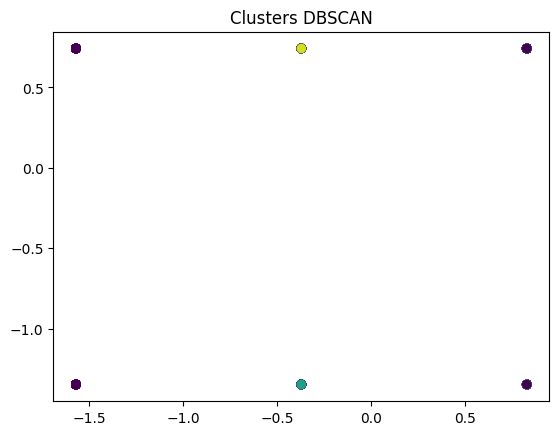

In [21]:
from sklearn.cluster import DBSCAN

# Application de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train_scaled)

# Assigner les clusters aux données
train_df['Cluster_DBSCAN'] = dbscan.labels_

# Visualisation des clusters
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_df['Cluster_DBSCAN'], cmap='viridis')
plt.title("Clusters DBSCAN")
plt.show()

## **Question 3.4 : Pensez-vous que l'apprentissage non supervisé peut atteindre des performances similaires à un modèle supervisé pour prédire la survie ? Pourquoi ou pourquoi pas ?**

**Réponse :**

L'apprentissage non supervisé **ne peut pas atteindre des performances similaires à un modèle supervisé** pour prédire la survie, et voici pourquoi :

1. **Objectif différent** :
   - **Apprentissage supervisé** : Le modèle apprend directement à prédire la survie à partir des étiquettes fournies.
   - **Apprentissage non supervisé** : Le modèle regroupe les données en clusters sans connaître les étiquettes. Les clusters ne correspondent pas nécessairement aux étiquettes de survie.

2. **Manque de guidance** :
   - Sans étiquettes, le clustering ne peut pas garantir que les clusters correspondent aux classes de survie.

3. **Utilisation complémentaire** :
   - Le clustering peut être utile pour explorer les données et identifier des patterns, mais il ne remplace pas un modèle supervisé pour la prédiction.